In [11]:
from CBBA import CBBA_agent
from CBAA import CBAA_agent

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# For build GIF
import imageio
import os

import time

In [12]:
task_num = 20
group_num=4
for i in range(group_num):
  globals()['group{}_num'.format(i)]=5

robot_num = group_num * group0_num

task = np.random.uniform(low=0,high=30,size=(task_num,2))

robots = []
for i in range(group_num):
  robots.append([])
  for j in range(globals()['group{}_num'.format(i)]):
    robots[i].append(np.random.uniform(low=i*5, high=i*5+5, size=(1,2)))

==Iteration 0==
Auction Process
Bundle
[11, 10, 15, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 6, 17]
[10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19, 15]
[11, 10, 15, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 6, 17]
[10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19, 15]
[10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19, 15]
[15, 10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[15, 10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19, 15]
[15, 10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19, 15]
[15, 10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11, 10, 15, 19, 1, 6, 17]
[15, 10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[15, 10, 11, 9, 18, 12, 13, 0, 3, 16, 

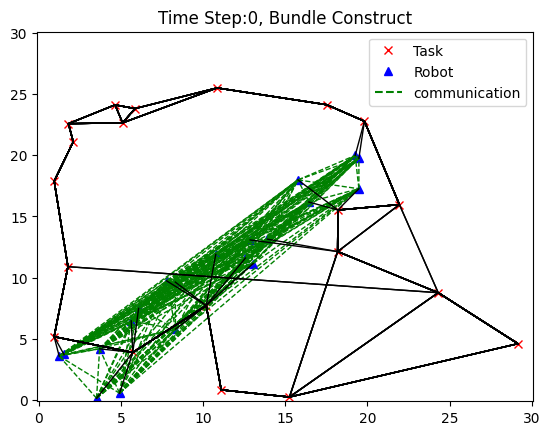

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[]
[15]
[]
[]
[]
[]
[]
[]
[]
[2]
[5]
[]
[]
[]
[4, 8, 14, 3, 0, 16, 13]
Path
[]
[]
[11]
[]
[10]
[]
[15]
[]
[]
[]
[]
[]
[]
[]
[2]
[5]
[]
[]
[]
[4, 8, 14, 3, 0, 16, 13]
==Iteration 1==
Auction Process
Bundle
[10, 15, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 6, 17]
[11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19, 15]
[11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19, 15]
[11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19, 15]
[10, 15, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 6, 17]
[9, 11, 10, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[15, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11, 6, 17]
[15, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11, 6, 17]
[10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[15, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11, 6, 17]
[2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11, 10, 19, 1, 6, 17]
[5, 7, 4, 8, 14, 3, 0, 16, 13, 1

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[9]
[15, 19, 1]
[]
[]
[]
[]
[]
[]
[]
[2]
[5]
[]
[7]
[]
[4, 8, 14, 3, 0, 16]
Path
[]
[]
[11]
[]
[10]
[9]
[15, 19, 1]
[]
[]
[]
[]
[]
[]
[]
[2]
[5]
[]
[7]
[]
[4, 8, 14, 3, 0, 16]
==Iteration 2==
Auction Process
Bundle
[9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19, 15]
[19, 1, 15, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17]
[11, 15, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[19, 1, 15, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17]
[10, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 6, 17]
[9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19, 10]
[15, 19, 1, 6, 17, 7, 5, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11]
[9, 11, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11, 6, 17]
[11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11, 10, 19, 1, 6, 17]
[15, 10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 6, 17, 1, 19

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[]
[15]
[9]
[19, 1]
[]
[]
[]
[]
[]
[2, 6, 17]
[5]
[]
[7]
[]
[4, 8, 14, 3, 0, 16]
Path
[]
[]
[11]
[]
[10]
[]
[15]
[9]
[19, 1]
[]
[]
[]
[]
[]
[2, 6, 17]
[5]
[]
[7]
[]
[4, 8, 14, 3, 0, 16]
==Iteration 3==
Auction Process
Bundle
[15, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[15, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1]
[11, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[15, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1]
[10, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1]
[10, 19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[15, 9, 11, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 6, 17, 1]
[9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[19, 1, 6, 17, 7, 5, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11]
[9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[10, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 6, 17, 1, 19]
[7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11, 10, 19, 1, 6, 17]
[9, 11, 10, 19, 1, 6, 17, 7, 4, 

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[]
[15]
[9, 18, 12, 13]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5]
[]
[7, 6, 17]
[8, 14, 3, 0, 16]
[4]
Path
[]
[]
[11]
[]
[10]
[]
[15]
[9, 18, 12, 13]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5]
[]
[7, 6, 17]
[8, 14, 3, 0, 16]
[4]
==Iteration 4==
Auction Process
Bundle
[19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 6, 17]
[11, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1]
[9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1]
[10, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[15, 1, 6, 17, 7, 5, 4, 8, 14, 3, 0, 16, 13, 12, 18, 11]
[9, 18, 12, 13, 16, 3, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[19, 1, 17, 7, 5, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11]
[19, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11, 19, 1, 6, 17]
[9, 11, 10, 19, 1, 6, 17, 4, 8, 14, 3, 0, 16, 13, 12, 18]
[10, 11, 19, 1, 6, 17, 7, 4, 8, 14, 3, 0, 16, 13, 12, 

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[]
[15]
[9, 18, 12, 13]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5]
[]
[7, 6, 17]
[8, 14, 3, 0, 16]
[4]
Path
[]
[]
[11]
[]
[10]
[]
[15]
[9, 18, 12, 13]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5]
[]
[7, 6, 17]
[8, 14, 3, 0, 16]
[4]
==Iteration 5==
Auction Process
Bundle
[18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1]
[9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17]
[11, 1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 6, 17]
[1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[10, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17]
[18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17, 1]
[15, 11, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 6, 17]
[9, 18, 12, 13, 3, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[19, 1, 11, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5]
[1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[9, 11, 19, 1, 6, 17, 4, 8, 14, 3, 0, 16, 13, 12, 18]
[10, 11, 19, 1, 6, 17, 4, 8, 14, 3, 0, 16, 13, 12, 18]
[19, 1, 6, 17, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 11]
[19, 1, 6, 17, 4, 8, 14, 3, 0, 16, 13, 12,

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5]
[14, 3, 0, 16]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5]
[14, 3, 0, 16]
[7, 6, 17]
[8]
[4]
==Iteration 6==
Auction Process
Bundle
[1, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 6, 17]
[2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[11, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17]
[18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17]
[10, 2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 6, 17]
[18, 12, 13, 16, 3, 14, 8, 4, 7, 5, 2, 6, 17, 1]
[15, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 6, 17]
[9, 12, 13, 3, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[19, 1, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9]
[18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17]
[19, 1, 6, 17, 4, 8, 14, 3, 0, 16, 13, 12, 18, 11]
[4, 8, 14, 3, 0, 16, 13, 12, 18, 11, 19, 1, 6, 17]
[18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 6, 17, 1, 11]
[1, 6, 17, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11]
[2, 8, 14, 3, 0, 16, 13, 12, 18, 9, 11, 10, 19

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5]
[14, 3, 0, 16]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5]
[14, 3, 0, 16]
[7, 6, 17]
[8]
[4]
==Iteration 7==
Auction Process
Bundle
[12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17]
[18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 6, 17]
[11, 13, 0, 3, 16, 14, 8, 4, 7, 5, 2, 6, 17]
[2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 6, 17]
[10, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 6, 17]
[18, 12, 13, 3, 14, 8, 4, 7, 5, 2, 6, 17, 1]
[15, 18, 12, 13, 0, 3, 16, 14, 8, 4, 7, 6, 17]
[9, 13, 3, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[19, 1, 7, 4, 8, 14, 3, 0, 16, 13, 12, 18, 9]
[2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 6, 17]
[1, 6, 17, 4, 8, 14, 3, 0, 16, 13, 12, 18, 11]
[8, 14, 3, 0, 16, 13, 12, 18, 11, 19, 1, 6, 17]
[7, 4, 8, 14, 3, 0, 16, 13, 12, 11, 1, 6, 17]
[9, 11, 18, 12, 13, 0, 3, 16, 14, 8, 4, 6, 17]
[2, 17, 19, 10, 11, 9, 18, 12, 13, 0, 3, 16, 14]
[5, 3, 0, 16, 13, 12, 18, 9, 11, 10, 19, 1, 17

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5]
[14, 3, 0, 16]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5]
[14, 3, 0, 16]
[7, 6, 17]
[8]
[4]
==Iteration 8==
Auction Process
Bundle
[2, 5, 7, 4, 8, 14, 3, 0, 16, 13, 6, 17]
[5, 7, 4, 8, 14, 3, 0, 16, 13, 12, 6, 17]
[11, 16, 3, 0, 14, 8, 4, 7, 5, 2, 6, 17]
[12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 6, 17]
[10, 12, 13, 0, 3, 16, 14, 8, 4, 7, 6, 17]
[18, 12, 13, 14, 8, 4, 7, 5, 2, 6, 17, 1]
[15, 6, 17, 7, 4, 8, 14, 3, 0, 16, 13, 12]
[9, 3, 14, 8, 4, 7, 5, 2, 6, 17, 1, 19]
[19, 1, 9, 18, 12, 13, 0, 3, 16, 14, 8, 4]
[12, 13, 0, 3, 16, 14, 8, 4, 7, 5, 6, 17]
[6, 17, 4, 8, 14, 3, 0, 16, 13, 12, 18, 11]
[6, 17, 1, 19, 11, 18, 12, 13, 0, 3, 16, 14]
[11, 1, 6, 17, 4, 8, 14, 3, 0, 16, 13, 12]
[6, 17, 4, 8, 14, 3, 0, 16, 13, 12, 18, 11]
[2, 19, 10, 11, 9, 18, 12, 13, 0, 3, 16, 14]
[5, 16, 0, 13, 12, 18, 9, 11, 10, 19, 1, 17]
[14, 3, 0, 16, 9, 11, 10, 15, 19, 1, 6, 17]
[7, 6, 1

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5, 16]
[14, 3, 0]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[]
[]
[2]
[5, 16]
[14, 3, 0]
[7, 6, 17]
[8]
[4]
==Iteration 9==
Auction Process
Bundle
[13, 0, 3, 16, 14, 8, 4, 7, 5, 6, 17]
[12, 13, 0, 3, 16, 14, 8, 4, 7, 6, 17]
[11, 2, 5, 7, 4, 8, 14, 3, 0, 6, 17]
[5, 7, 4, 8, 14, 3, 0, 16, 13, 6, 17]
[10, 16, 3, 0, 13, 14, 8, 4, 7, 6, 17]
[18, 12, 13, 8, 4, 7, 5, 2, 6, 17, 1]
[15, 7, 4, 8, 14, 3, 0, 16, 13, 12, 17]
[9, 19, 1, 2, 5, 7, 4, 8, 14, 6, 17]
[19, 1, 18, 12, 13, 0, 3, 16, 14, 8, 4]
[5, 7, 4, 8, 14, 3, 0, 16, 13, 6, 17]
[18, 12, 13, 0, 3, 16, 14, 8, 4, 17, 11]
[16, 3, 0, 13, 12, 18, 14, 11, 19, 1, 17]
[16, 3, 0, 13, 12, 14, 8, 4, 6, 17, 1]
[4, 8, 14, 3, 0, 16, 13, 12, 18, 11, 17]
[2, 10, 11, 9, 18, 12, 13, 0, 3, 16, 14]
[5, 16, 13, 12, 18, 9, 11, 10, 19, 1, 17]
[14, 3, 0, 9, 11, 10, 15, 19, 1, 6, 17]
[7, 6, 17, 9, 11, 18, 12, 13, 0, 3, 16]
[8, 0, 18, 9, 11, 10, 15, 1

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[16, 3, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[16, 3, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 10==
Auction Process
Bundle
[16, 3, 0, 14, 8, 4, 7, 5, 6, 17]
[6, 17, 7, 4, 8, 14, 3, 0, 16, 13]
[11, 3, 0, 14, 8, 4, 7, 5, 6, 17]
[13, 0, 3, 16, 14, 8, 4, 7, 6, 17]
[10, 13, 0, 3, 14, 8, 4, 7, 6, 17]
[18, 12, 13, 5, 2, 7, 4, 6, 17, 1]
[15, 12, 13, 0, 3, 16, 14, 8, 4, 17]
[9, 2, 5, 7, 4, 8, 14, 6, 17, 1]
[19, 1, 4, 8, 14, 3, 0, 16, 13, 12]
[16, 3, 0, 13, 14, 8, 4, 7, 6, 17]
[11, 12, 13, 0, 3, 16, 14, 8, 4, 17]
[19, 1, 17, 14, 3, 0, 13, 12, 18, 11]
[16, 3, 0, 12, 14, 8, 4, 6, 17, 1]
[11, 18, 12, 13, 0, 3, 16, 14, 8, 17]
[2, 14, 3, 0, 16, 13, 12, 18, 9, 11]
[5, 17, 1, 19, 10, 11, 9, 18, 12, 13]
[14, 0, 9, 11, 10, 15, 19, 1, 6, 17]
[7, 6, 17, 11, 18, 12, 13, 0, 3, 16]
[8, 6, 17, 1, 19, 10, 11, 9, 18, 15]
[4, 16, 0, 9, 11, 10, 15, 19, 1, 17]
Path
[16, 3, 0, 14, 

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[16, 3, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[16, 3, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 11==
Auction Process
Bundle
[5, 7, 4, 8, 14, 3, 0, 6, 17]
[16, 3, 0, 13, 14, 8, 4, 7, 17]
[11, 0, 14, 8, 4, 7, 5, 6, 17]
[6, 17, 7, 4, 8, 14, 3, 0, 16]
[10, 6, 17, 7, 4, 8, 14, 3, 0]
[18, 12, 13, 4, 7, 2, 6, 17, 1]
[15, 16, 3, 0, 13, 14, 8, 4, 17]
[9, 5, 7, 4, 8, 14, 6, 17, 1]
[19, 1, 8, 14, 3, 0, 16, 13, 12]
[13, 0, 3, 14, 8, 4, 7, 6, 17]
[4, 8, 14, 3, 0, 16, 13, 12, 17]
[14, 3, 0, 13, 12, 18, 11, 1, 17]
[16, 3, 0, 14, 8, 4, 6, 17, 1]
[8, 14, 3, 0, 16, 13, 12, 18, 17]
[2, 9, 11, 18, 12, 13, 0, 3, 16]
[5, 1, 19, 10, 11, 9, 18, 12, 13]
[14, 9, 11, 10, 15, 19, 1, 6, 17]
[7, 6, 17, 16, 3, 0, 13, 12, 18]
[8, 18, 9, 11, 10, 15, 19, 1, 17]
[4, 0, 9, 11, 10, 15, 19, 1, 17]
Path
[5, 7, 4, 8, 14, 3, 0, 6, 17]
[16, 3, 0, 13, 14, 8, 4, 7, 17]
[11, 0, 14, 8, 4, 7, 5, 6,

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[16, 3, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[]
[16, 3, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 12==
Auction Process
Bundle
[3, 0, 14, 8, 4, 7, 6, 17]
[13, 0, 3, 14, 8, 4, 7, 17]
[11, 5, 7, 4, 8, 14, 6, 17]
[16, 3, 0, 14, 8, 4, 7, 17]
[10, 3, 0, 14, 8, 4, 7, 17]
[18, 12, 13, 2, 7, 6, 17, 1]
[15, 3, 0, 13, 14, 8, 4, 17]
[9, 1, 6, 17, 7, 4, 8, 14]
[19, 1, 16, 3, 0, 13, 12, 14]
[3, 0, 14, 8, 4, 7, 6, 17]
[16, 3, 0, 13, 12, 14, 8, 17]
[3, 0, 13, 12, 18, 11, 1, 17]
[16, 3, 0, 8, 4, 6, 17, 1]
[18, 12, 13, 0, 3, 16, 14, 17]
[2, 16, 3, 0, 13, 12, 18, 11]
[5, 19, 10, 11, 9, 18, 12, 13]
[14, 15, 10, 11, 19, 1, 6, 17]
[7, 6, 17, 3, 0, 13, 12, 18]
[8, 15, 10, 11, 9, 19, 1, 17]
[4, 15, 10, 11, 9, 19, 1, 17]
Path
[3, 0, 14, 8, 4, 7, 6, 17]
[13, 0, 3, 14, 8, 4, 7, 17]
[11, 5, 7, 4, 8, 14, 6, 17]
[16, 3, 0, 14, 8, 4, 7, 17]
[10, 3, 0, 14, 8, 4, 7, 17]
[18, 12, 13, 2, 

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3, 0]
[16]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3, 0]
[16]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 13==
Auction Process
Bundle
[0, 14, 8, 4, 7, 6, 17]
[7, 4, 8, 14, 3, 0, 17]
[11, 14, 8, 4, 7, 6, 17]
[3, 0, 14, 8, 4, 7, 17]
[10, 7, 4, 8, 14, 0, 17]
[18, 12, 13, 7, 6, 17, 1]
[15, 13, 0, 14, 8, 4, 17]
[9, 14, 8, 4, 7, 6, 17]
[19, 1, 12, 13, 0, 3, 14]
[0, 14, 8, 4, 7, 6, 17]
[8, 14, 3, 0, 13, 12, 17]
[3, 0, 12, 18, 11, 1, 17]
[16, 0, 8, 4, 6, 17, 1]
[16, 3, 0, 13, 12, 14, 17]
[2, 3, 0, 13, 12, 18, 11]
[5, 12, 13, 18, 9, 11, 10]
[14, 6, 17, 1, 19, 10, 11]
[7, 6, 17, 18, 12, 13, 0]
[8, 9, 11, 10, 19, 1, 17]
[4, 17, 1, 19, 10, 11, 9]
Path
[0, 14, 8, 4, 7, 6, 17]
[7, 4, 8, 14, 3, 0, 17]
[11, 14, 8, 4, 7, 6, 17]
[3, 0, 14, 8, 4, 7, 17]
[10, 7, 4, 8, 14, 0, 17]
[18, 12, 13, 7, 6, 17, 1]
[15, 13, 0, 14, 8, 4, 17]
[9, 14, 8, 4, 7, 6, 17]
[19, 1, 12, 13, 0, 3, 14]
[0, 14

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 14==
Auction Process
Bundle
[6, 17, 7, 4, 8, 14]
[3, 0, 14, 8, 4, 17]
[11, 7, 4, 8, 6, 17]
[0, 14, 8, 4, 7, 17]
[10, 0, 14, 8, 4, 17]
[18, 12, 13, 1, 6, 17]
[15, 0, 14, 8, 4, 17]
[9, 8, 4, 7, 6, 17]
[19, 1, 3, 0, 13, 14]
[6, 17, 7, 4, 8, 14]
[3, 0, 13, 12, 14, 17]
[3, 12, 18, 11, 1, 17]
[16, 0, 4, 6, 17, 1]
[14, 3, 0, 13, 12, 17]
[2, 0, 13, 12, 18, 11]
[5, 10, 11, 9, 18, 13]
[14, 10, 11, 19, 1, 17]
[7, 6, 17, 0, 13, 12]
[8, 17, 1, 19, 10, 11]
[4, 9, 11, 10, 19, 1]
Path
[7, 6, 17, 4, 8, 14]
[3, 0, 14, 8, 4, 17]
[11, 6, 7, 4, 8, 17]
[0, 14, 8, 4, 7, 17]
[10, 0, 14, 8, 4, 17]
[18, 12, 13, 1, 6, 17]
[15, 0, 14, 8, 4, 17]
[9, 8, 4, 7, 6, 17]
[19, 1, 3, 0, 13, 14]
[7, 6, 17, 4, 8, 14]
[3, 0, 13, 12, 14, 17]
[3, 12, 18, 11, 1, 17]
[16, 0, 4, 6, 17, 1]
[14, 3, 0, 13, 12

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 15==
Auction Process
Bundle
[14, 8, 4, 7, 17]
[0, 14, 8, 4, 17]
[11, 6, 17, 4, 8]
[7, 4, 8, 14, 17]
[10, 14, 8, 4, 17]
[18, 12, 13, 6, 17]
[15, 14, 8, 4, 17]
[9, 7, 4, 6, 17]
[19, 1, 14, 0, 13]
[7, 4, 8, 14, 17]
[14, 0, 13, 12, 17]
[3, 18, 11, 1, 17]
[16, 0, 6, 17, 1]
[3, 0, 13, 12, 17]
[2, 18, 12, 13, 11]
[5, 9, 11, 18, 13]
[14, 11, 19, 1, 17]
[7, 6, 17, 12, 13]
[8, 10, 11, 19, 1]
[4, 1, 19, 10, 11]
Path
[14, 8, 4, 7, 17]
[0, 14, 8, 4, 17]
[11, 6, 17, 4, 8]
[7, 4, 8, 14, 17]
[10, 14, 8, 4, 17]
[18, 12, 13, 6, 17]
[15, 14, 8, 4, 17]
[9, 7, 4, 6, 17]
[19, 1, 14, 0, 13]
[7, 4, 8, 14, 17]
[14, 0, 13, 12, 17]
[3, 18, 11, 1, 17]
[16, 0, 6, 17, 1]
[3, 0, 13, 12, 17]
[2, 18, 12, 13, 11]
[5, 13, 18, 9, 11]
[14, 11, 19, 1, 17]
[7, 6, 17, 12, 13]
[8, 10, 11, 19, 1]
[4, 1,

<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 16==
Auction Process
Bundle
[7, 4, 8, 17]
[17, 4, 8, 14]
[11, 8, 4, 17]
[17, 4, 8, 14]
[10, 8, 4, 17]
[18, 12, 13, 17]
[15, 4, 8, 17]
[9, 4, 6, 17]
[19, 1, 13, 0]
[14, 8, 4, 17]
[12, 13, 0, 17]
[3, 11, 1, 17]
[16, 0, 1, 17]
[12, 13, 0, 17]
[2, 12, 13, 11]
[5, 18, 13, 11]
[14, 19, 1, 17]
[7, 6, 17, 13]
[8, 1, 19, 11]
[4, 10, 11, 19]
Path
[7, 4, 8, 17]
[17, 4, 8, 14]
[11, 8, 4, 17]
[17, 4, 8, 14]
[10, 8, 4, 17]
[18, 12, 13, 17]
[15, 4, 8, 17]
[9, 4, 6, 17]
[19, 1, 13, 0]
[14, 8, 4, 17]
[12, 13, 0, 17]
[3, 11, 1, 17]
[16, 0, 1, 17]
[12, 13, 0, 17]
[2, 12, 13, 11]
[5, 18, 13, 11]
[14, 19, 1, 17]
[7, 6, 17, 13]
[8, 1, 19, 11]
[4, 19, 10, 11]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 17==
Auction Process
Bundle
[8, 4, 17]
[14, 8, 4]
[11, 4, 17]
[14, 8, 4]
[10, 17, 4]
[18, 12, 13]
[15, 8, 17]
[9, 6, 17]
[19, 1, 0]
[8, 4, 17]
[0, 13, 17]
[3, 1, 17]
[16, 0, 17]
[0, 13, 17]
[2, 11, 13]
[5, 13, 11]
[14, 1, 17]
[7, 6, 17]
[8, 19, 11]
[4, 19, 11]
Path
[8, 4, 17]
[14, 8, 4]
[11, 4, 17]
[14, 8, 4]
[10, 17, 4]
[18, 12, 13]
[15, 8, 17]
[9, 6, 17]
[19, 1, 0]
[8, 4, 17]
[0, 13, 17]
[3, 1, 17]
[16, 0, 17]
[0, 13, 17]
[2, 11, 13]
[5, 13, 11]
[14, 1, 17]
[7, 6, 17]
[8, 19, 11]
[4, 19, 11]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12, 13]
[15]
[9]
[19, 1]
[]
[]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 18==
Auction Process
Bundle
[4, 17]
[8, 4]
[11, 17]
[8, 4]
[10, 4]
[18, 12, 13]
[15, 17]
[9, 17]
[19, 1]
[4, 17]
[13, 17]
[3, 17]
[16, 0]
[13, 17]
[2, 13]
[5, 11]
[14, 17]
[7, 6, 17]
[8, 11]
[4, 11]
Path
[4, 17]
[8, 4]
[11, 17]
[8, 4]
[10, 4]
[18, 12, 13]
[15, 17]
[9, 17]
[19, 1]
[4, 17]
[13, 17]
[3, 17]
[16, 0]
[13, 17]
[2, 13]
[5, 11]
[14, 17]
[7, 6, 17]
[8, 11]
[4, 11]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12]
[15]
[9]
[19, 1]
[]
[13]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12]
[15]
[9]
[19, 1]
[]
[13]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 19==
Auction Process
Bundle
[17]
[4]
[11]
[4]
[10]
[18, 12]
[15]
[9]
[19, 1]
[17]
[13]
[3]
[16, 0]
[17]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[17]
[4]
[11]
[4]
[10]
[18, 12]
[15]
[9]
[19, 1]
[17]
[13]
[3]
[16, 0]
[17]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12]
[15]
[9]
[19, 1]
[]
[13]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12]
[15]
[9]
[19, 1]
[]
[13]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
==Iteration 20==
Auction Process
Bundle
[]
[]
[11]
[]
[10]
[18, 12]
[15]
[9]
[19, 1]
[]
[13]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12]
[15]
[9]
[19, 1]
[]
[13]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[]
[11]
[]
[10]
[18, 12]
[15]
[9]
[19, 1]
[]
[13]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
Path
[]
[]
[11]
[]
[10]
[18, 12]
[15]
[9]
[19, 1]
[]
[13]
[3]
[16, 0]
[]
[2]
[5]
[14]
[7, 6, 17]
[8]
[4]
20.74486 sec


C:\Users\User\AppData\Local\Temp\ipykernel_7760\2638555865.py:162: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
C:\Users\User\AppData\Local\Temp\ipykernel_7760\2638555865.py:167: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


<Figure size 640x480 with 0 Axes>

In [13]:
########################
#### One-layer CBBA ####
########################

robots_1D = sum(robots,[])
robot_list = [CBBA_agent(id=i, state=robots_1D[i],vel=1, task_num=task_num, agent_num=robot_num, L_t=task.shape[0]) for i in range(robot_num)]

# Network Initialize
G = np.ones((robot_num, robot_num)) # Fully connected network
# disconnect link arbitrary

G[2,3]=0
G[3,2]=0
G[1,2]=0
G[2,1]=0
G[1,3]=0
G[3,1]=0

fig, ax = plt.subplots()
ax.set_xlim((-0.1,30.1))
ax.set_ylim((-0.1,30.1))

ax.plot(task[:,0],task[:,1],'rx',label="Task")
robot_pos = np.array([r.state[0].tolist() for r in robot_list])
ax.plot(robot_pos[:,0],robot_pos[:,1],'b^',label="Robot")

for i in range(robot_num-1):
  for j in range(i+1,robot_num):
    if G[i][j] == 1:
      ax.plot([robot_pos[i][0],robot_pos[j][0]],[robot_pos[i][1],robot_pos[j][1]],'g--',linewidth=1)

handles, labels = ax.get_legend_handles_labels()
custom_line = Line2D([0], [0], color="g",linestyle="--",label="communication")
handles.append(custom_line)
ax.legend(handles=handles)

t = 0 # Iteration number
assign_plots = []
max_t = 100
plot_gap = 0.1

save_gif = True
filenames = []

if save_gif:
  if not os.path.exists("one_layer_cbba_gif"):
    os.makedirs("one_layer_cbba_gif")

start = time.time()
while True:
  converged_list = []

  print("==Iteration {}==".format(t))
  ## Phase 1: Auction Process
  print("Auction Process")
  for robot_id, robot in enumerate(robot_list):
    # select task by local information
    robot.build_bundle(task)

    ## Plot
    if len(robot.p) > 0:
      x_data=[robot.state[0][0]]+task[robot.p,0].tolist()
      y_data=[robot.state[0][1]]+task[robot.p,1].tolist()
    else:
      x_data=[robot.state[0][0]]
      y_data=[robot.state[0][1]]
    if t == 0:
      assign_line, = ax.plot(x_data,y_data,'k-',linewidth=1)
      assign_plots.append(assign_line)
    else:
      assign_plots[robot_id].set_data(x_data,y_data)

  print("Bundle")
  for robot in robot_list:
    print(robot.b)
  print("Path")
  for robot in robot_list:
    print(robot.p)

  ## Plot
  ax.set_title("Time Step:{}, Bundle Construct".format(t))
  plt.pause(plot_gap)
  if save_gif:
    filename = f'{t}_B.png'
    filenames.append(filename)
    plt.savefig(filename)

  ## Communication stage
  print("Communicating...")
  # Send winning bid list to neighbors (depend on env)
  message_pool = [robot.send_message() for robot in robot_list]

  for robot_id, robot in enumerate(robot_list):
    # Recieve winning bidlist from neighbors
    g = G[robot_id]

    connected, = np.where(g==1)
    connected = list(connected)
    connected.remove(robot_id)

    if len(connected) > 0:
      Y = {neighbor_id:message_pool[neighbor_id] for neighbor_id in connected}
    else:
      Y = None

    robot.receive_message(Y)

  ## Phase 2: Consensus Process
  print("Consensus Process")
  for robot_id, robot in enumerate(robot_list):
    # Update local information and decision
    if Y is not None:
      converged = robot.update_task()
      converged_list.append(converged)

    ## Plot
    if len(robot.p) > 0:
      x_data=[robot.state[0][0]]+task[robot.p,0].tolist()
      y_data=[robot.state[0][1]]+task[robot.p,1].tolist()
    else:
      x_data=[robot.state[0][0]]
      y_data=[robot.state[0][1]]

    assign_plots[robot_id].set_data(x_data,y_data)

  ## Plot
  ax.set_title("Time Step:{}, Consensus".format(t))
  plt.pause(plot_gap)
  if save_gif:
    filename = f'./one_layer_cbba_gif/{t}_C.png'
    filenames.append(filename)
    plt.savefig(filename)

  print("Bundle")
  for robot in robot_list:
    print(robot.b)
  print("Path")
  for robot in robot_list:
    print(robot.p)

  t += 1

  if sum(converged_list) == robot_num:
    ax.set_title("Time Step:{}, Converged!".format(t))
    break
  if t>max_t:
    ax.set_title("Time Step:{}, Max time step overed".format(t))
    break
end = time.time()

print(f"{end-start:.5f} sec")


if save_gif:
    filename = f'./one_layer_cbba_gif/{t}_F.png'
    filenames.append(filename)
    plt.savefig(filename)

    #build gif
    files=[]
    for filename in filenames:
        image = imageio.imread(filename)
        files.append(image)
    imageio.mimsave("./one_layer_cbba_gif/mygif.gif", files, format='GIF', duration = 0.5)
    with imageio.get_writer('./one_layer_cbba_gif/mygif.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    # Remove files
    for filename in set(filenames):
        os.remove(filename)

plt.show()


==Iteration 0==
Auction Process


c:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


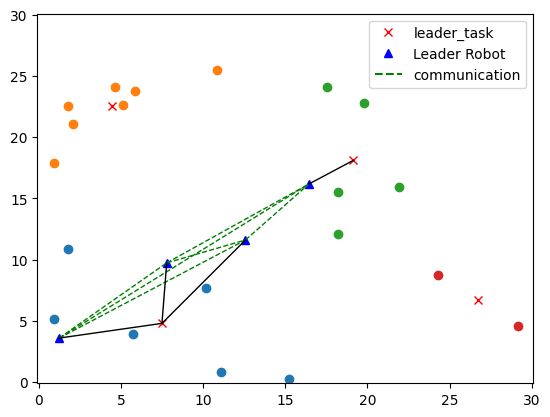

Consensus Process
False
True
False
True
==Iteration 1==
Auction Process
Consensus Process
False
True
True
True
==Iteration 2==
Auction Process
Consensus Process
True
True
True
True
Leader CONVERGED
==Iteration 0==
Auction Process
0
1
2
3
4
Bundle
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
Path
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


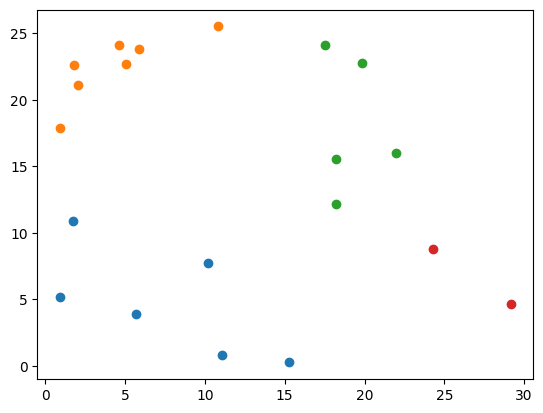

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[0, 1]
[]
[]
[]
Path
[]
[0, 1]
[]
[]
[]
==Iteration 1==
Auction Process
0
1
2
3
4
Bundle
[1]
[0, 1]
[1]
[1]
[1]
Path
[1]
[0, 1]
[1]
[1]
[1]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[0]
[]
[]
[1]
Path
[]
[0]
[]
[]
[1]
==Iteration 2==
Auction Process
0
1
2
3
4
Bundle
[]
[0]
[]
[]
[1]
Path
[]
[0]
[]
[]
[1]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[0]
[]
[]
[1]
Path
[]
[0]
[]
[]
[1]
==Iteration 0==
Auction Process
0
1
2
3
4
Bundle
[4, 2, 3, 1, 5, 0]
[4, 2, 3, 1, 5, 0]
[2, 3, 1, 4, 5, 0]
[4, 2, 3, 1, 5, 0]
[2, 3, 1, 4, 5, 0]
Path
[4, 2, 3, 1, 5, 0]
[4, 2, 3, 1, 5, 0]
[2, 3, 1, 4, 5, 0]
[4, 2, 3, 1, 5, 0]
[2, 3, 1, 4, 5, 0]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[4]
[]
[]
[2, 3, 1]
Path
[]
[4]
[]
[]
[2, 3, 1]
==Iteration 1==
Auction Process
0
1
2
3
4
Bundle
[1, 3, 2, 5, 0]
[4, 5, 0, 3, 1]
[4, 5, 0, 3, 1]
[2, 3, 1, 5, 0]
[2, 3, 1, 5, 0]
Path
[1, 3, 2, 5, 0]
[4, 5, 0, 3, 1]
[4, 5, 0, 3, 1]
[2, 3, 1, 5, 0]
[2, 3, 1, 5, 0]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[1]
[4, 5, 0]
[]
[]
[2, 3]
Path
[1]
[4, 5, 0]
[]
[]
[2, 3]
==Iteration 2==
Auction Process
0
1
2
3
4
Bundle
[1, 2, 5, 0]
[4, 5, 0, 1]
[1, 3, 5, 0]
[5, 0, 3, 1]
[2, 3, 5, 0]
Path
[1, 2, 5, 0]
[4, 5, 0, 1]
[1, 3, 5, 0]
[5, 0, 3, 1]
[2, 3, 5, 0]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[4]
[1]
[5, 0]
[2, 3]
Path
[]
[4]
[1]
[5, 0]
[2, 3]
==Iteration 3==
Auction Process
0
1
2
3
4
Bundle
[2, 5, 0]
[4, 1, 0]
[1, 5, 0]
[5, 0, 1]
[2, 3, 0]
Path
[2, 5, 0]
[4, 1, 0]
[1, 5, 0]
[5, 0, 1]
[2, 3, 0]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[4]
[1]
[5, 0]
[2, 3]
Path
[]
[4]
[1]
[5, 0]
[2, 3]
==Iteration 4==
Auction Process
0
1
2
3
4
Bundle
[5, 0]
[4, 0]
[1, 0]
[5, 0]
[2, 3]
Path
[5, 0]
[4, 0]
[1, 0]
[5, 0]
[2, 3]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[4]
[1]
[5, 0]
[2, 3]
Path
[]
[4]
[1]
[5, 0]
[2, 3]
==Iteration 5==
Auction Process
0
1
2
3
4
Bundle
[0]
[4]
[1]
[5, 0]
[2, 3]
Path
[0]
[4]
[1]
[5, 0]
[2, 3]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[4]
[1]
[5, 0]
[2, 3]
Path
[]
[4]
[1]
[5, 0]
[2, 3]
==Iteration 6==
Auction Process
0
1
2
3
4
Bundle
[]
[4]
[1]
[5, 0]
[2, 3]
Path
[]
[4]
[1]
[5, 0]
[2, 3]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[4]
[1]
[5, 0]
[2, 3]
Path
[]
[4]
[1]
[5, 0]
[2, 3]
==Iteration 0==
Auction Process
0
1
2
3
4
Bundle
[6, 2, 3, 0, 1, 5, 4]
[5, 1, 0, 3, 2, 6, 4]
[6, 2, 3, 0, 1, 5, 4]
[6, 2, 3, 0, 1, 5, 4]
[4, 1, 0, 5, 3, 2, 6]
Path
[6, 2, 3, 0, 1, 5, 4]
[5, 1, 0, 3, 2, 6, 4]
[6, 2, 3, 0, 1, 5, 4]
[6, 2, 3, 0, 1, 5, 4]
[4, 1, 0, 5, 3, 2, 6]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[5, 1, 0]
[6, 2, 3]
[]
[4]
Path
[]
[5, 1, 0]
[6, 2, 3]
[]
[4]
==Iteration 1==
Auction Process
0
1
2
3
4
Bundle
[5, 1, 0, 3, 2, 4]
[5, 1, 0, 2, 6, 4]
[6, 2, 3, 5, 1, 4]
[5, 1, 0, 3, 2, 4]
[4, 0, 5, 3, 2, 6]
Path
[5, 1, 0, 3, 2, 4]
[5, 1, 0, 2, 6, 4]
[6, 2, 3, 5, 1, 4]
[5, 1, 0, 3, 2, 4]
[4, 0, 5, 3, 2, 6]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[5, 1, 0]
[6, 2, 3]
[]
[4]
Path
[]
[5, 1, 0]
[6, 2, 3]
[]
[4]
==Iteration 2==
Auction Process
0
1
2
3
4
Bundle
[1, 0, 3, 2, 4]
[5, 1, 0, 4, 6]
[6, 2, 3, 1, 4]
[4, 1, 0, 3, 2]
[4, 5, 3, 2, 6]
Path
[1, 0, 3, 2, 4]
[5, 1, 0, 4, 6]
[6, 2, 3, 1, 4]
[4, 1, 0, 3, 2]
[4, 5, 3, 2, 6]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[5, 1, 0]
[6, 2, 3]
[]
[4]
Path
[]
[5, 1, 0]
[6, 2, 3]
[]
[4]
==Iteration 3==
Auction Process
0
1
2
3
4
Bundle
[4, 0, 3, 2]
[5, 1, 0, 6]
[6, 2, 3, 4]
[1, 0, 3, 2]
[4, 3, 2, 6]
Path
[4, 0, 3, 2]
[5, 1, 0, 6]
[6, 2, 3, 4]
[1, 0, 3, 2]
[4, 3, 2, 6]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[]
[5, 1, 0]
[6, 2, 3]
[]
[4]
Path
[]
[5, 1, 0]
[6, 2, 3]
[]
[4]
==Iteration 4==
Auction Process
0
1
2
3
4
Bundle
[2, 3, 0]
[5, 1, 0]
[6, 2, 3]
[2, 3, 0]
[4, 2, 6]
Path
[2, 3, 0]
[5, 1, 0]
[6, 2, 3]
[2, 3, 0]
[4, 2, 6]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[2, 3]
[5, 1, 0]
[6]
[]
[4]
Path
[2, 3]
[5, 1, 0]
[6]
[]
[4]
==Iteration 5==
Auction Process
0
1
2
3
4
Bundle
[2, 3]
[5, 1, 0]
[6, 3]
[0, 3]
[4, 6]
Path
[2, 3]
[5, 1, 0]
[6, 3]
[0, 3]
[4, 6]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[2, 3]
[5, 1, 0]
[6]
[]
[4]
Path
[2, 3]
[5, 1, 0]
[6]
[]
[4]
==Iteration 6==
Auction Process
0
1
2
3
4
Bundle
[2, 3]
[5, 1, 0]
[6]
[3]
[4]
Path
[2, 3]
[5, 1, 0]
[6]
[3]
[4]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[2, 3]
[5, 1, 0]
[6]
[]
[4]
Path
[2, 3]
[5, 1, 0]
[6]
[]
[4]
==Iteration 7==
Auction Process
0
1
2
3
4
Bundle
[2, 3]
[5, 1, 0]
[6]
[]
[4]
Path
[2, 3]
[5, 1, 0]
[6]
[]
[4]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[2, 3]
[5, 1, 0]
[6]
[]
[4]
Path
[2, 3]
[5, 1, 0]
[6]
[]
[4]
==Iteration 0==
Auction Process
0
1
2
3
4
Bundle
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[1, 4, 2, 0, 3]
[1, 4, 2, 0, 3]
Path
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[2, 0, 3, 1, 4]
[1, 4, 2, 0, 3]
[1, 4, 2, 0, 3]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[2, 0, 3]
[]
[]
[]
[1, 4]
Path
[2, 0, 3]
[]
[]
[]
[1, 4]
==Iteration 1==
Auction Process
0
1
2
3
4
Bundle
[2, 0, 3, 4]
[1, 4, 3, 0]
[3, 0, 1, 4]
[2, 0, 3, 4]
[1, 4, 3, 0]
Path
[2, 0, 3, 4]
[1, 4, 3, 0]
[3, 0, 1, 4]
[3, 2, 0, 4]
[1, 4, 3, 0]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[2, 0]
[]
[3]
[]
[1, 4]
Path
[2, 0]
[]
[3]
[]
[1, 4]
==Iteration 2==
Auction Process
0
1
2
3
4
Bundle
[2, 0, 4]
[0, 3, 4]
[3, 1, 4]
[3, 0, 4]
[1, 4, 0]
Path
[2, 0, 4]
[0, 3, 4]
[3, 1, 4]
[3, 0, 4]
[1, 4, 0]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[2, 0]
[]
[3]
[]
[1, 4]
Path
[2, 0]
[]
[3]
[]
[1, 4]
==Iteration 3==
Auction Process
0
1
2
3
4
Bundle
[2, 0]
[4, 3]
[3, 4]
[4, 0]
[1, 4]
Path
[2, 0]
[4, 3]
[3, 4]
[4, 0]
[1, 4]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[2, 0]
[]
[3]
[4]
[1]
Path
[2, 0]
[]
[3]
[4]
[1]
==Iteration 4==
Auction Process
0
1
2
3
4
Bundle
[2, 0]
[3]
[3]
[4]
[1]
Path
[2, 0]
[3]
[3]
[4]
[1]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[2, 0]
[]
[3]
[4]
[1]
Path
[2, 0]
[]
[3]
[4]
[1]
==Iteration 5==
Auction Process
0
1
2
3
4
Bundle
[2, 0]
[]
[3]
[4]
[1]
Path
[2, 0]
[]
[3]
[4]
[1]


<Figure size 640x480 with 0 Axes>

Communicating...
Consensus Process


<Figure size 640x480 with 0 Axes>

Bundle
[2, 0]
[]
[3]
[4]
[1]
Path
[2, 0]
[]
[3]
[4]
[1]
11.61451 sec


C:\Users\User\AppData\Local\Temp\ipykernel_7760\1553257777.py:284: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
C:\Users\User\AppData\Local\Temp\ipykernel_7760\1553257777.py:289: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


<Figure size 640x480 with 0 Axes>

In [14]:
########################
#### Two-layer CBBA ####
########################

####################
#### Clustering ####
####################
cluster = KMeans(n_clusters=group_num)
cluster.fit(task)
cluster_task = cluster.fit_predict(task)
cluster_center_point = cluster.cluster_centers_
cluster_group_task = []
temp_group_task = cluster_task.tolist()
for i in range(len(cluster_center_point)):
    # print(np.where(cluster_task==i))
    cluster_group_task.append([t for t,value in enumerate(temp_group_task) if value==i])

#####################
#### Leader CBAA ####
#####################
# leader_list = [CBBA_agent(id=i, vel=1, task_num=len(cluster_center_point), agent_num=group_num, L_t=cluster_center_point.shape[0]) for i in range(group_num)]
leader_list = [CBAA_agent(id=i, state=robots[i][0],task=cluster_center_point) for i in range(group_num)]
# Network Initialize
G_leader = np.ones((group_num, group_num)) # Fully connected network
# disconnect link arbitrary
# G_leader[2,3]=0
# G_leader[3,2]=0
# G_leader[1,2]=0
# G_leader[2,1]=0
# G_leader[1,3]=0
# G_leader[3,1]=0

#### Plot ####
fig, ax = plt.subplots()
ax.set_xlim((-0.1,30.1))
ax.set_ylim((-0.1,30.1))

ax.plot(cluster_center_point[:,0],cluster_center_point[:,1],'rx',label="leader_task")
for i in range(group_num):
  plt.scatter(task[np.where(cluster_task==i),0],task[np.where(cluster_task==i),1])
robot_pos = np.array([r.state[0].tolist() for r in leader_list])
ax.plot(robot_pos[:,0],robot_pos[:,1],'b^',label="Leader Robot")
##############

for i in range(group_num-1):
  for j in range(i+1,group_num):
    if G_leader[i][j] == 1:
      ax.plot([robot_pos[i][0],robot_pos[j][0]],[robot_pos[i][1],robot_pos[j][1]],'g--',linewidth=1)

handles, labels = ax.get_legend_handles_labels()
custom_line = Line2D([0], [0], color="g",linestyle="--",label="communication")
handles.append(custom_line)
ax.legend(handles=handles)

t = 0 # Iteration number
assign_plots = []

start = time.time()
while True:
  converged_list = []
  print("==Iteration {}==".format(t))
  ## Phase 1: Auction Process
  print("Auction Process")
  for leader_id, leader in enumerate(leader_list):
    # select task by local information
    leader.select_task()

    if t == 0:
      assign_line, = ax.plot([leader.state[0][0],cluster_center_point[leader.J,0]],[leader.state[0][1],cluster_center_point[leader.J,1]],'k-',linewidth=1)
      assign_plots.append(assign_line)
    else:
      assign_plots[leader_id].set_data([leader.state[0][0],cluster_center_point[leader.J,0]],[leader.state[0][1],cluster_center_point[leader.J,1]])

  plt.pause(0.5)

  ## Phase 2: Consensus Process
  print("Consensus Process")
  # Send winning bid list to neighbors (depend on env)
  message_pool = [leader.send_message() for leader in leader_list]

  for leader_id, leader in enumerate(leader_list):
    # Recieve winning bidlist from neighbors
    g = G_leader[leader_id]
    connected, = np.where(g==1)
    connected = list(connected)
    connected.remove(leader_id)

    if len(connected) > 0:
        Y = {neighbor_id:message_pool[neighbor_id] for neighbor_id in connected}
    else:
        Y = None

    # Update local information and decision
    if Y is not None:
      converged = leader.update_task(Y)
      converged_list.append(converged)
      print(converged)

    # print(robot.x)

    if any(leader.x): # (list)
      assign_plots[leader_id].set_data([leader.state[0][0],cluster_center_point[leader.J,0]],[leader.state[0][1],cluster_center_point[leader.J,1]])
    else:
      assign_plots[leader_id].set_data([leader.state[0][0],leader.state[0][0]],[leader.state[0][1],leader.state[0][1]])

  plt.pause(0.5)

  t += 1

  # 모든 로봇 agent 수와 최적의 임무계획 결과 수가 같으면 모든게 합의됨.
  if sum(converged_list)==group_num:
    break

print("Leader CONVERGED")

####################
#### Group CBBA ####
####################
# Group Network Initialize
G0 = np.ones((group0_num, group0_num)) # Fully connected network
# disconnect link arbitrary

#### Group allocated task ####
for i in range(group_num):
  globals()['group{}_task'.format(i)]=task[np.array(cluster_group_task[leader_list[i].J])]
  group_task = np.array(cluster_group_task[leader_list[i].J])
  globals()['group{}_robot'.format(i)]=[CBBA_agent(id=k, state=robots[i][k], vel=1, task_num=len(globals()['group{}_task'.format(i)]), agent_num=globals()['group{}_num'.format(i)], L_t=group_task.shape[0]) for k in range(globals()['group{}_num'.format(i)])]
##############################

#### Plot ####
# plt.show()
plt.cla()
for i in range(group_num):
  plt.scatter(task[np.where(cluster_task==i),0],task[np.where(cluster_task==i),1])
robot_pos = np.array([r.state[0].tolist() for r in leader_list])
ax.plot(robot_pos[:,0],robot_pos[:,1],'b^',label="Leader Robot")

for i in range(group_num):
  group_pos = np.array

for i in range(group_num-1):
  for j in range(i+1,group_num):
    if G_leader[i][j] == 1:
      ax.plot([robot_pos[i][0],robot_pos[j][0]],[robot_pos[i][1],robot_pos[j][1]],'g--',linewidth=1)

for i in range(group_num):
  globals()['group{}_pose'.format(i)]=np.array([r.state[0].tolist() for r in globals()['group{}_robot'.format(i)]])
  ax.plot(globals()['group{}_pose'.format(i)][1:,0], globals()['group{}_pose'.format(i)][1:,1],'m^',label="follower Robot")

for k in range(group_num):
  for i in range(globals()['group{}_num'.format(k)]-1):
    for j in range(i+1,globals()['group{}_num'.format(k)]):
      if G0[i][j] == 1:
        ax.plot([globals()['group{}_pose'.format(k)][i][0],globals()['group{}_pose'.format(k)][j][0]],[globals()['group{}_pose'.format(k)][i][1],globals()['group{}_pose'.format(k)][j][1]],'k--',linewidth=1)
##############

t = 0 # Iteration number
assign_plots = []
max_t = 100
plot_gap = 0.1

save_gif = True
filenames = []

if save_gif:
  if not os.path.exists("two_layer_cbba_gif"):
    os.makedirs("two_layer_cbba_gif")

for r in range(group_num):
  t=0
  assign_plots.append([])
  while True:  
    converged_list = []

    print("==Iteration {}==".format(t))
    ## Phase 1: Auction Process
    print("Auction Process")
    for robot_id, robot in enumerate(globals()['group{}_robot'.format(r)]):
      # select task by local information
      print(robot_id)
      robot.build_bundle(globals()['group{}_task'.format(r)])

      ## Plot
      if len(robot.p) > 0:
        x_data=[robot.state[0][0]]+globals()['group{}_task'.format(r)][robot.p,0].tolist()
        y_data=[robot.state[0][1]]+globals()['group{}_task'.format(r)][robot.p,1].tolist()
      else:
        x_data=[robot.state[0][0]]
        y_data=[robot.state[0][1]]
      if t == 0:
        assign_line, = ax.plot(x_data,y_data,'k-',linewidth=1)
        assign_plots[r].append(assign_line)
      else:
        assign_plots[r][robot_id].set_data(x_data,y_data)

    print("Bundle")
    for robot in globals()['group{}_robot'.format(r)]:
      print(robot.b)
    print("Path")
    for robot in globals()['group{}_robot'.format(r)]:
      print(robot.p)

    ## Plot
    ax.set_title("Time Step:{}, Bundle Construct".format(t))
    plt.pause(plot_gap)
    if save_gif:
      filename = f'{t}_B.png'
      filenames.append(filename)
      plt.savefig(filename)

    ## Communication stage
    print("Communicating...")
    # Send winning bid list to neighbors (depend on env)
    message_pool = [robot.send_message() for robot in globals()['group{}_robot'.format(r)]]

    for robot_id, robot in enumerate(globals()['group{}_robot'.format(r)]):
      # Recieve winning bidlist from neighbors
      g = G0[robot_id]

      connected, = np.where(g==1)
      connected = list(connected)
      connected.remove(robot_id)

      if len(connected) > 0:
        Y = {neighbor_id:message_pool[neighbor_id] for neighbor_id in connected}
      else:
        Y = None

      robot.receive_message(Y)

    ## Phase 2: Consensus Process
    print("Consensus Process")
    for robot_id, robot in enumerate(globals()['group{}_robot'.format(r)]):
      # Update local information and decision
      if Y is not None:
        converged = robot.update_task()
        converged_list.append(converged)

      ## Plot
      if len(robot.p) > 0:
        x_data=[robot.state[0][0]]+globals()['group{}_task'.format(r)][robot.p,0].tolist()
        y_data=[robot.state[0][1]]+globals()['group{}_task'.format(r)][robot.p,1].tolist()
      else:
        x_data=[robot.state[0][0]]
        y_data=[robot.state[0][1]]

      assign_plots[r][robot_id].set_data(x_data,y_data)

    ## Plot
    ax.set_title("Time Step:{}, Consensus".format(t))
    plt.pause(plot_gap)
    if save_gif:
      filename = f'./two_layer_cbba_gif/{t}_C.png'
      filenames.append(filename)
      plt.savefig(filename)

    print("Bundle")
    for robot in globals()['group{}_robot'.format(r)]:
      print(robot.b)
    print("Path")
    for robot in globals()['group{}_robot'.format(r)]:
      print(robot.p)

    t += 1

    if sum(converged_list) == group0_num:
      ax.set_title("Time Step:{}, Converged!".format(t))
      break
    if t>max_t:
      ax.set_title("Time Step:{}, Max time step overed".format(t))
      break
end = time.time()

print(f"{end-start:.5f} sec")

if save_gif:
    filename = f'./two_layer_cbba_gif/{t}_F.png'
    filenames.append(filename)
    plt.savefig(filename)

    #build gif
    files=[]
    for filename in filenames:
        image = imageio.imread(filename)
        files.append(image)
    imageio.mimsave("./two_layer_cbba_gif/mygif.gif", files, format='GIF', duration = 0.5)
    with imageio.get_writer('./two_layer_cbba_gif/mygif.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    # Remove files
    for filename in set(filenames):
        os.remove(filename)

plt.show()